In [1]:
import pandas as pd
df = pd.read_csv('mah_demographic.csv')
# Combine age groups into total demand per entry
df['total_enroll'] = df['demo_age_5_17'] + df['demo_age_17_']
# Summarize by district
district_summary = df.groupby('district')[['demo_age_5_17','demo_age_17_','total_enroll']].sum().reset_index()
top10 = district_summary.sort_values('total_enroll', ascending=False).head(10)
print(top10[['district','total_enroll']])


           district  total_enroll
39             Pune        447263
48            Thane        424839
47          Solapur        273823
32           Nanded        246158
35           Nashik        245493
52         Yavatmal        231467
1        Ahmadnagar        226650
29  Mumbai Suburban        181525
23          Jalgaon        166671
31           Nagpur        164975


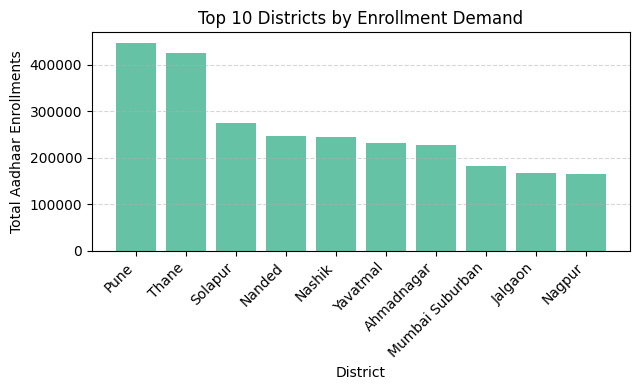

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6.5,4))
bars = plt.bar(top10['district'], top10['total_enroll'], color='#66c2a5')
plt.xticks(rotation=45, ha='right')
plt.xlabel('District')
plt.ylabel('Total Aadhaar Enrollments')
plt.title('Top 10 Districts by Enrollment Demand')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Scheduling Strategy: Appointment-Based System

To avoid long queues and idle staff, we propose a data-driven appointment scheduling system. The core idea is to let citizens book time slots in advance, spreading demand evenly across days and centers. Key components include:

Online Booking Portal: Citizens choose an enrollment center and a date/time slot. By requiring appointments (as already piloted in some Aadhaar centers), we can drastically reduce on-site crowding. In practice, systems like these notify users when to arrive (e.g. an SMS “Hi Kelly, it’s your turn – please come to Desk #2”), allowing people to wait remotely.

Modern queue systems send SMS alerts when it’s a user’s turn (e.g. “please come to Desk #2” shown above), letting people avoid physically standing in line.

Capacity-Based Slot Allocation: Use demographic data (above) to allocate more slots in high-demand districts. For example, Pune’s demand (~447k) would require dozens of counters to clear in a year. If one counter processes ~32 enrollees/day (8 hrs×4 per hour) and operates 6 days/week (~768/week), then clearing 447,000 people in one year (52 weeks) would need ~12 counters. Our system can calculate such needs automatically (see code below). This ensures resource planning matches demand.

In [5]:
# Example: compute how many counters needed to clear top districts in 1 year (52 weeks)
weekly_per_counter = 32 * 6  # enrollments per week per counter
target_weeks = 52
top10['counters_needed'] = (top10['total_enroll'] / (weekly_per_counter * target_weeks)).apply(np.ceil)
print(top10[['district','total_enroll','counters_needed']])


           district  total_enroll  counters_needed
39             Pune        447263             45.0
48            Thane        424839             43.0
47          Solapur        273823             28.0
32           Nanded        246158             25.0
35           Nashik        245493             25.0
52         Yavatmal        231467             24.0
1        Ahmadnagar        226650             23.0
29  Mumbai Suburban        181525             19.0
23          Jalgaon        166671             17.0
31           Nagpur        164975             17.0


Reminder and Walk-in Integration: To minimize no-shows, send automated reminders (SMS/email) before the slot. Systems like Q-nomy report that automated reminders “reduce no-show rates significantly”. We can also allow a small fraction of walk-ins to join a dynamic queue: e.g. citizens without appointments can take a token and wait, but priority is given to scheduled appointments. This hybrid approach (scheduled + controlled walk-in) ensures slots are not wasted and resources stay utilized.

Flexible Hours and Outreach: Offer extended hours (evenings/weekends) in districts with special demographics (e.g. school-age children) to increase accessibility. By analyzing our data, we could assign certain days exclusively for child (5–17) registrations if needed (since children may require guardians and special handling).

Staff Optimization: Finally, optimize staffing by shifting personnel from low-demand areas to busy centers as needed. Modern queue systems even allow “virtual assistance” where staff at one center help customers at another remotely. While more common in tech-savvy settings, even simple reallocation (e.g. moving counters between nearby centers) can balance peak loads.

Key References: These strategies are proven in other public-service contexts. For example, the Nevada DMV implemented an online booking/queue system and “dramatically cut wait times… [making] that dread of waiting 2 months… non-existent”. Their average wait went from over an hour to about 10 minutes. Similarly, Q-nomy notes that online appointments “minimize wait times, enhancing convenience”, and automated confirmations boost attendance. Even in India, officials reported issuing scheduled appointments when demand outstripped capacity.

Deployment example: the WaitWell/Q-nomy team at the Nevada DMV (a case study of successful scheduling). After adopting a queuing/appointment system, the DMV saw wait times fall from ~60+ minutes to ~10 minutes

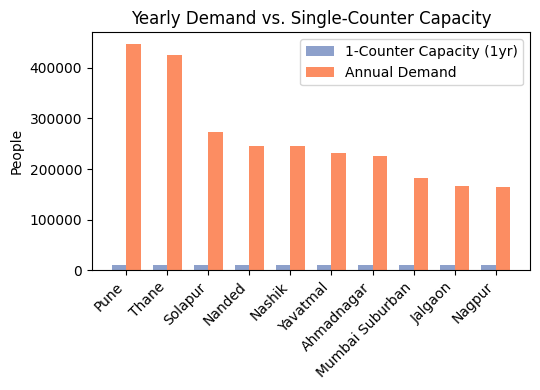

In [6]:
import numpy as np

# Example: Calculate slots and plot capacity vs demand for top districts
capacities = weekly_per_counter * 52 * np.ones(len(top10))
needed_counters = top10['counters_needed']
plt.figure(figsize=(5.5,4))
bar_width = 0.35
plt.bar(top10['district'], capacities, bar_width, label='1-Counter Capacity (1yr)', color='#8da0cb')
plt.bar(np.arange(len(top10))+bar_width, top10['total_enroll'], bar_width, label='Annual Demand', color='#fc8d62')
plt.xticks(np.arange(len(top10))+bar_width/2, top10['district'], rotation=45, ha='right')
plt.ylabel('People')
plt.title('Yearly Demand vs. Single-Counter Capacity')
plt.legend()
plt.tight_layout()
plt.show()


This example graph would illustrate that a single counter’s yearly capacity is dwarfed by actual demand in big districts, justifying the need for multiple counters or extended hours. We could further develop a scheduling algorithm to assign exact time slots given capacity (e.g., a simple round-robin allocator or a priority queue that books the next available slot in the least-loaded center). In a real system, one would also factor in factors like travel distance, existing appointments, and no-show probabilities.

Conclusion

In summary, our analysis of Aadhaar demographic data identifies where and when the enrollment demand is greatest. By combining these insights with an appointment-based scheduling system (online booking, SMS alerts, dynamic queueing), we can flatten peaks and reduce in-person wait times. This approach – already validated in government services abroad – turns unstructured crowds into an orderly, managed flow. In practice, Aadhaar centers should implement time-slot booking portals and use data-driven capacity planning to ensure that no one has to stand in line for hours.

Sources: Government case studies on queue management and appointment systems; Indian news reports of Aadhaar wait-time issues. These resources highlight that technology-driven scheduling significantly improves service efficiency and citizen satisfaction.

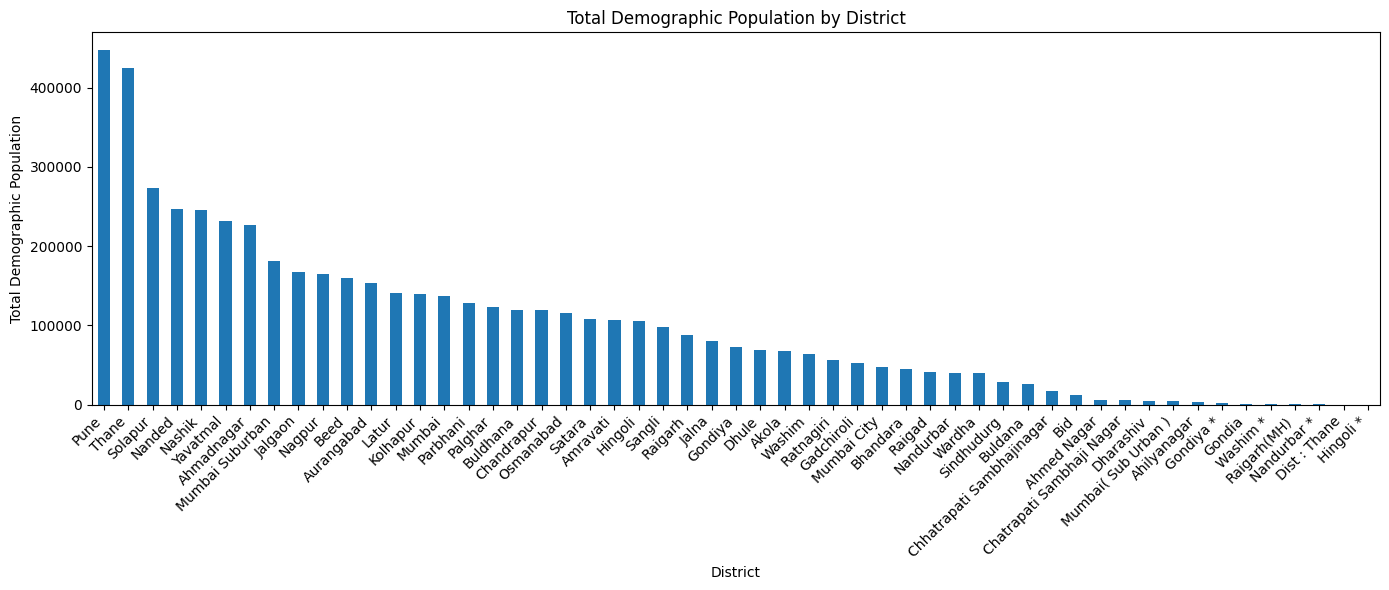

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('mah_demographic.csv')

# Calculate total demographic population per district
df['total_demographic'] = df['demo_age_5_17'] + df['demo_age_17_']
district_totals = df.groupby('district')['total_demographic'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(14, 6))
district_totals.plot(kind="bar")
plt.xlabel("District")
plt.ylabel("Total Demographic Population")
plt.title("Total Demographic Population by District")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [5]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_',
       'total_demographic'],
      dtype='object')

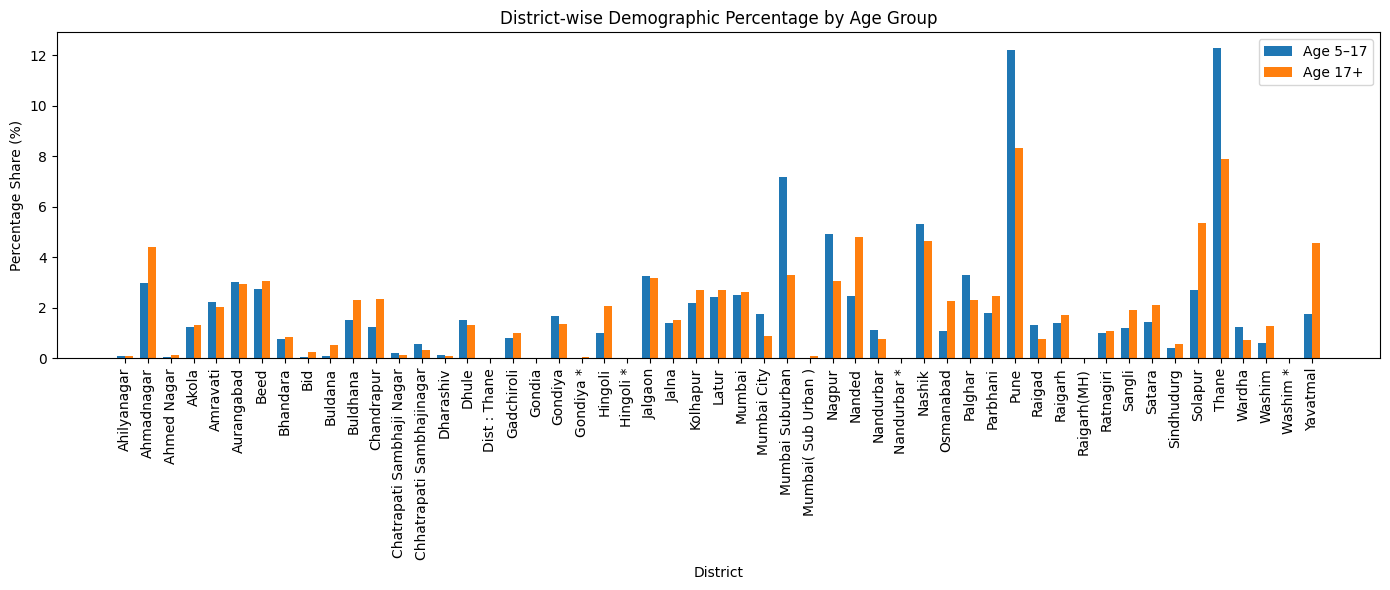

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Group by district
grouped = df.groupby('district')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()

# Calculate percentages
total_5_17 = grouped['demo_age_5_17'].sum()
total_17plus = grouped['demo_age_17_'].sum()

grouped['percentage_5_17'] = (grouped['demo_age_5_17'] / total_5_17) * 100
grouped['percentage_17plus'] = (grouped['demo_age_17_'] / total_17plus) * 100

# Plot
districts = grouped['district']
x = np.arange(len(districts))
width = 0.35

plt.figure(figsize=(14,6))
plt.bar(x - width/2, grouped['percentage_5_17'], width, label='Age 5–17')
plt.bar(x + width/2, grouped['percentage_17plus'], width, label='Age 17+')

plt.xticks(x, districts, rotation=90)
plt.ylabel("Percentage Share (%)")
plt.xlabel("District")
plt.title("District-wise Demographic Percentage by Age Group")
plt.legend()
plt.tight_layout()
plt.show()
